# Problem Statement

To predict price of the house in "King-County, USA", based on various factors involved.

# Importing required libraries

In [1]:
# Set the working directory
import os
#Read the cars.csv data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing and reading the data
os.chdir(r"/Users/pranavsmac/Documents/Praxis Study Materials/Dataset")
data = pd.read_csv("kc_house_train_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [3]:
data.shape

(9761, 21)

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [7]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False  False     False      False        False     False   False   
1     False  False  False     False      False        False     False   False   
2     False  False  False     False      False        False     False   False   
3     False  False  False     False      False        False     False   False   
4     False  False  False     False      False        False     False   False   
...     ...    ...    ...       ...        ...          ...       ...     ...   
9756  False  False  False     False      False        False     False   False   
9757  False  False  False     False      False        False     False   False   
9758  False  False  False     False      False        False     False   False   
9759  False  False  False     False      False        False     False   False   
9760  False  False  False     False      False 

**Initial hypothesis on the Columns:**

Going through the attributes in the given kc_housing dataset and creating the initial hypothesis which may change after doing the EDA.

**Date:** 
In the US, fiscal year starts on October 1, 2014, and ends on September 30, 2015. We can infer that the highest sales might happen post September in view of the bonuses and beginning of fiscal year.

**Price:**
Average house price in Kings County, Seattle in the  year 2014-2015 was around 0.3M. We can hypothesise whether the houses in the dataset conform to such a figure.

**Bedroom:**
Average family size in USA is around 3; and on an average each person might be having 1 bedroom. So, generally houses might have 3 bedrooms.

**Sqft_living:**
In 2019, the average sqft_living is around 2,301 square feet. We can hypothesise whether sqft_living increase/decrease over the past 5 years.

**Sqft_lot:**
The overall median lot size in the King County area is around 8,400 square feet in 2021.  We can hypothesise whether sqft_living increase/decrease over the past 5 years.

**Waterfront:**
Waterfront houses are highly desirable for their aesthetic and uplifting reasons. Generally, people prefer houses with waterfront and the prices can be high for the same. If the property does not have waterfront, then it is 0 and if otherwise, 1.

**View:**
The view of the property might also conform to higher property prices. Since and index from 0-4, shows how good the view of the property has, we can expect higher index with higher price.

**Condition:**
The better the condition of the house, higher the price for obvious reasons. 

**Grade:**
Houses of better grade would have costed more to build and command higher value. We can expect houses of better grade to have higher price.

**Yr_built:**
Newer the houses, the better the prices(unless renovated).

**Yr_renovated:**
Recently renovated houses might have higher price.

**Zipcode – latitude/longitude:**
Area or locality is an important feature in house price prediction. Houses in a particular locality will form a cohort and command similar pricing.  


### Data Cleaning:
Exploring the columns further in our dataset, splitting the date column into year, month and day which will help in identifying the number of years the houses are being sold and dropping the columns id, sqft_living15 and sqft_lot15 as they are not required to proceed with our analysis. 

In [56]:
#Splitting the date column as year, month and day
dateTime=pd.DatetimeIndex(data.date)
data['year']=dateTime.year
data['month']=dateTime.month
data['day']=dateTime.day
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'year', 'month', 'day'],
      dtype='object')

In [57]:
#Grouping months according to years
data.groupby(["year"])["month"].value_counts()

year  month
2014  7        1004
      6         991
      8         872
      10        871
      9         846
      5         777
      12        668
      11        645
2015  4        1004
      3         825
      2         540
      1         415
      5         303
Name: month, dtype: int64

In [58]:
#Exploring the columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'year', 'month', 'day'],
      dtype='object')

# Univariate Analysis

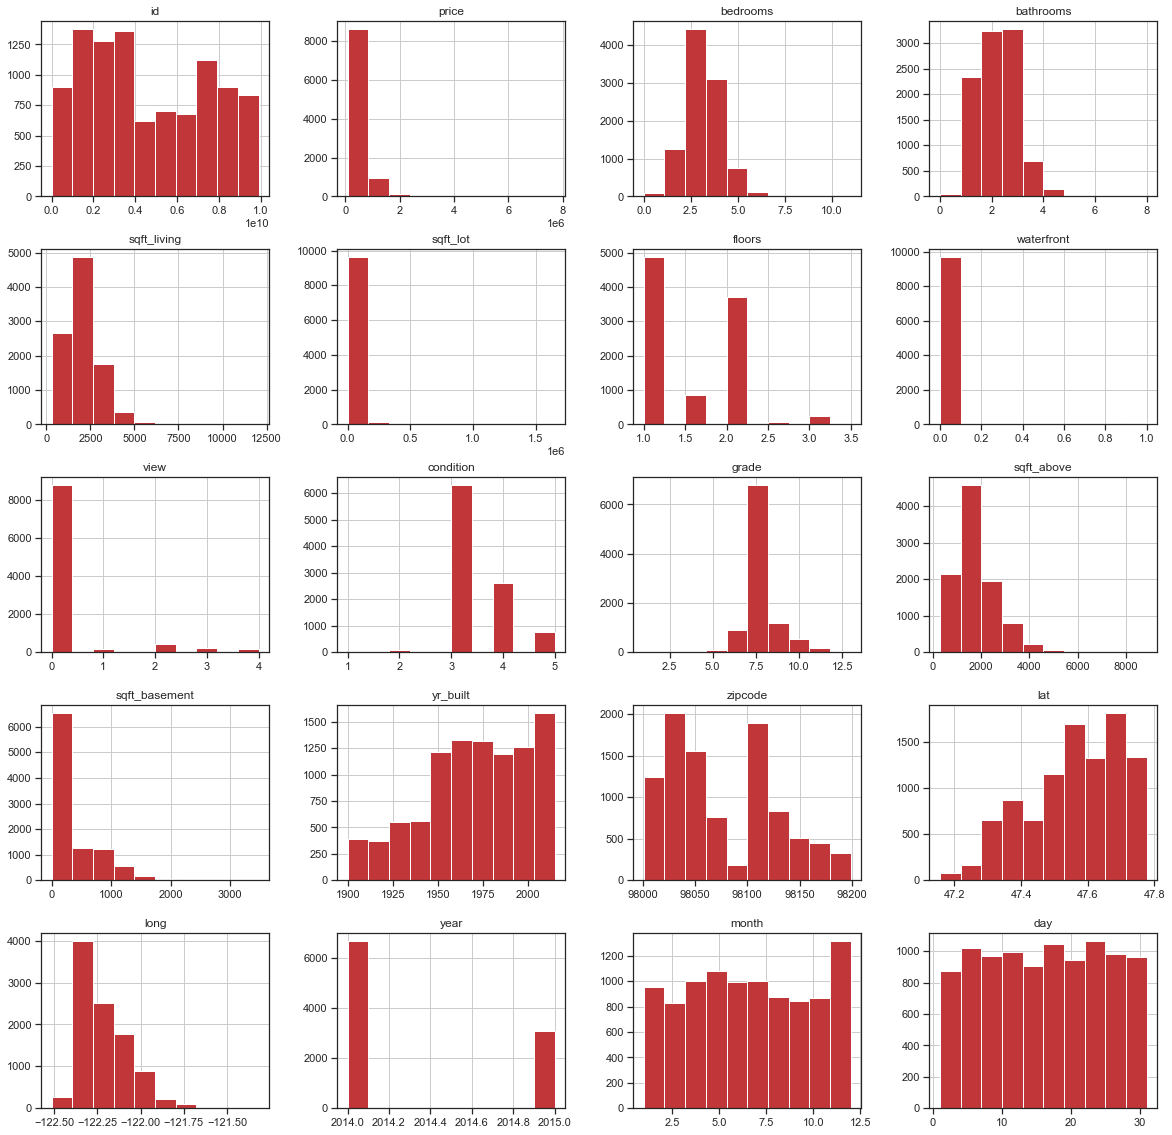

In [76]:
data.hist(figsize=(20,20));

In [8]:
def Graph(data, columns = '', directory = os.getcwd()):
    
    try:                     #to catch exceptions
        if columns == '':                #If no columns mentioned, considers all columns
            org_data = data
        else:
            org_data = data[columns]           #Takes mentioned columns only
        
        Numerical = []
        Categorical = []
        for columns in data:
            if (data.dtypes[columns] == 'int64') or (data.dtypes[columns] == 'float64'):         #Numerical columns
                Numerical.append(columns)
            else:
                Categorical.append(columns)       #categorical columns

        print ("***Graphs for Numerical data***\n")
        Discrete = []
        Continuous = []
        for i in Numerical:
            if len(data[i].value_counts())>10:         # Unique counts greater than 10 considered as continuous
                print ("***Graph for Continuous data***\n")
                data.boxplot(column = i,grid = True,figsize = (6,4),vert = False)  #boxplot
                data.hist(column = i,grid = False,figsize = (6,4),color = "turquoise",edgecolor = "blue")   #histogram
                plt.title(i, fontsize = 14)
                #plt.savefig(directory + r'/%s.png' %i)       #saving as '.png' image in the given directory
                plt.show()
            else:                    #10 and less unique counts considered as discrete
                print ("***Graph for Discrete data***\n")
                data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (6,4),color = "pink",edgecolor = "red",fontsize = 13)       #barplot
                plt.title(i, fontsize = 14)
                #plt.savefig(directory + r'/%s.png' %i)
                plt.show()


        print ("\n***Graphs for Categorical data***\n")
        for i in Categorical or len(data[i].value_counts())<10:
            data[i].value_counts().plot(kind = 'bar',rot=0, figsize = (6,4),color = "yellow",edgecolor = "green",fontsize = 13)       #barplot
            plt.ylabel('count')
            plt.title(i, fontsize = 14)
            #plt.savefig(directory + r'/%s.png' %i)
            plt.show()
    #error handling
    except KeyError:                                        
        print("\nPlease Enter valid column names")
    except FileNotFoundError:                              
        print("\nFile not found. Please enter the valid path of directory")
    except:
        print("\nERROR") 

***Graphs for Numerical data***

***Graph for Continuous data***



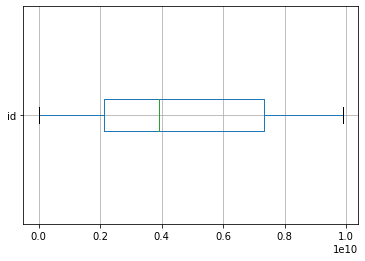

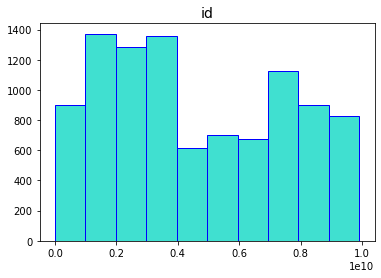

***Graph for Continuous data***



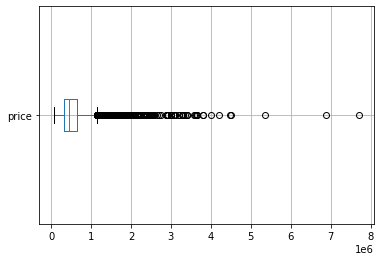

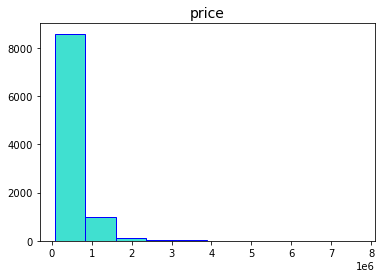

***Graph for Continuous data***



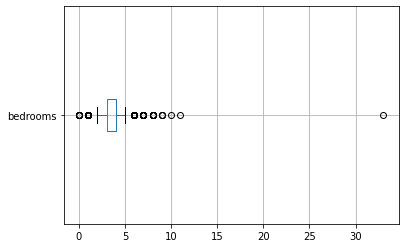

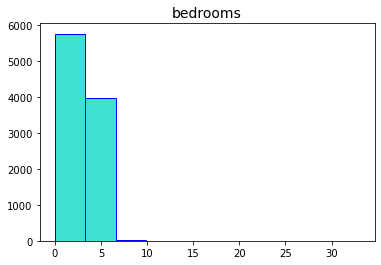

***Graph for Continuous data***



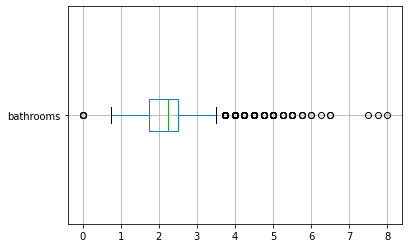

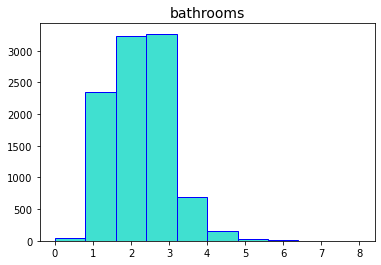

***Graph for Continuous data***



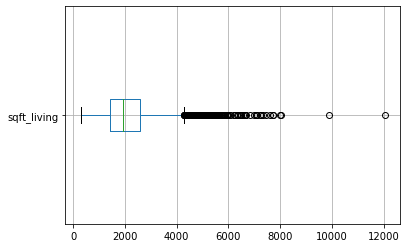

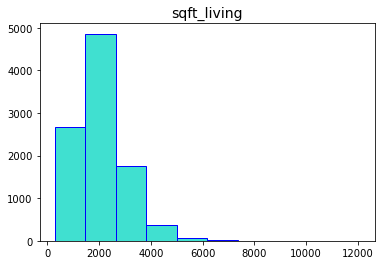

***Graph for Continuous data***



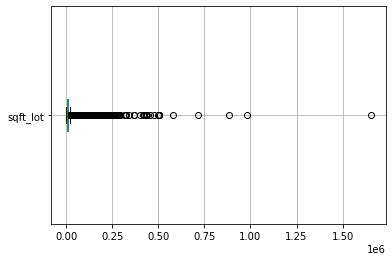

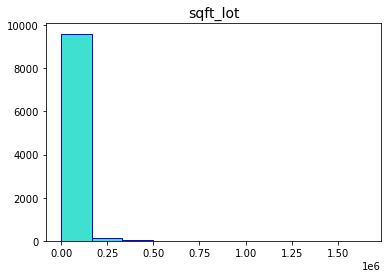

***Graph for Discrete data***



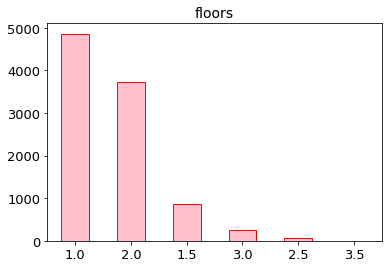

***Graph for Discrete data***



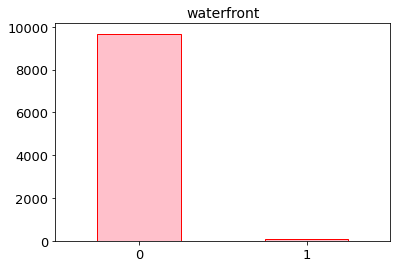

***Graph for Discrete data***



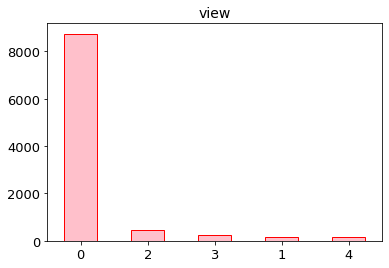

***Graph for Discrete data***



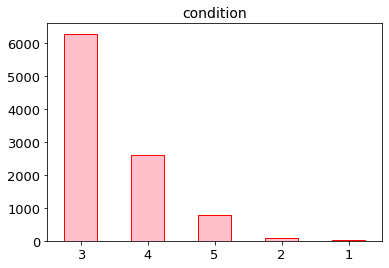

***Graph for Continuous data***



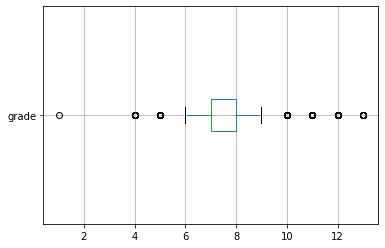

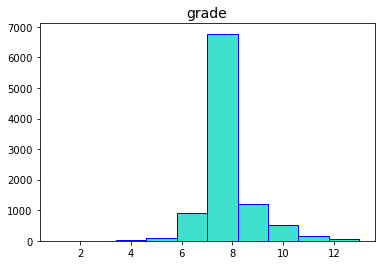

***Graph for Continuous data***



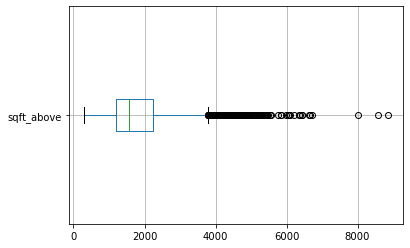

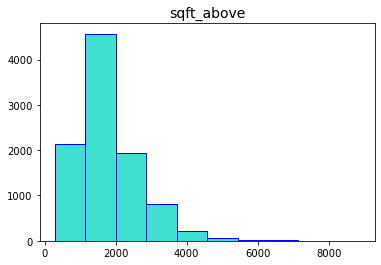

***Graph for Continuous data***



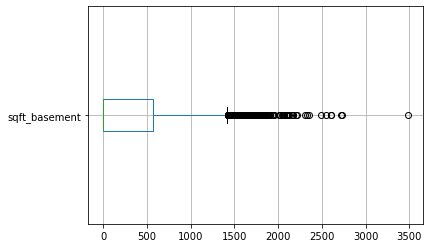

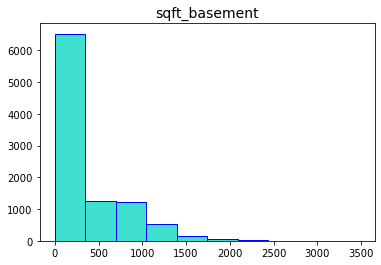

***Graph for Continuous data***



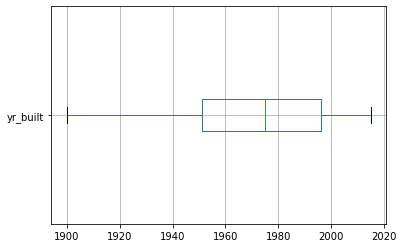

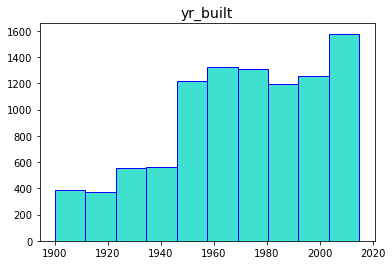

***Graph for Continuous data***



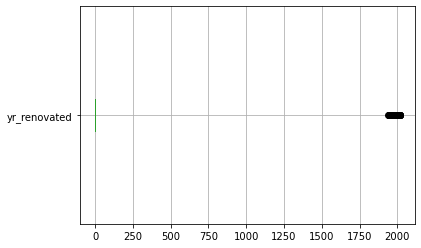

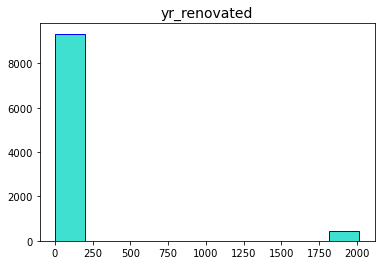

***Graph for Continuous data***



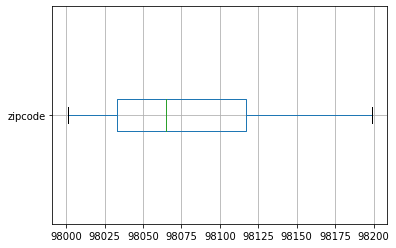

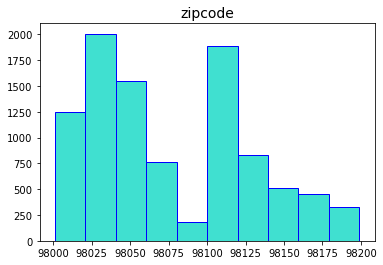

***Graph for Continuous data***



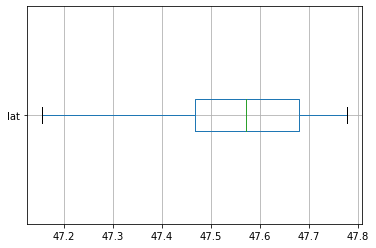

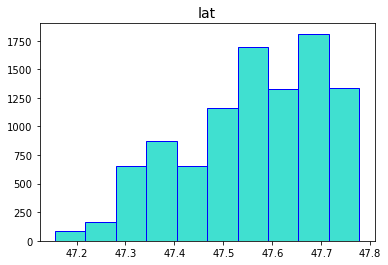

***Graph for Continuous data***



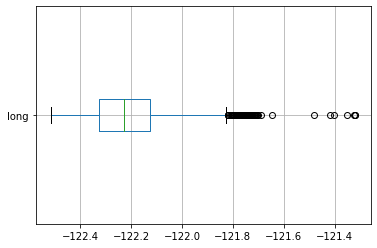

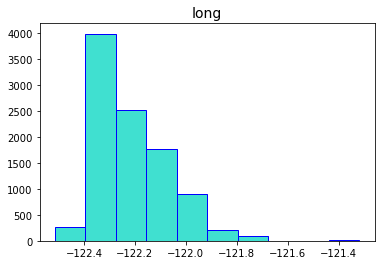

***Graph for Continuous data***



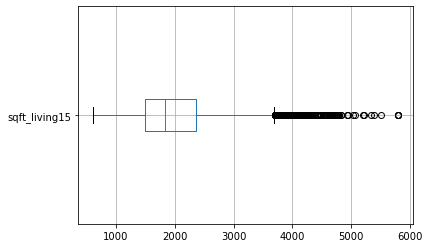

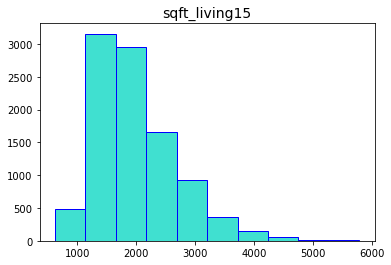

***Graph for Continuous data***



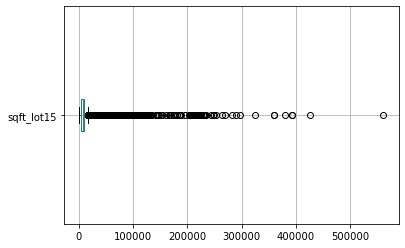

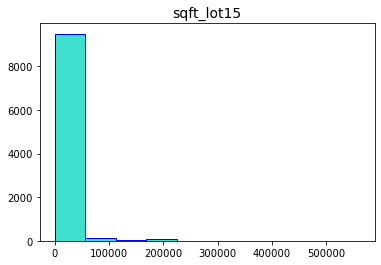


***Graphs for Categorical data***



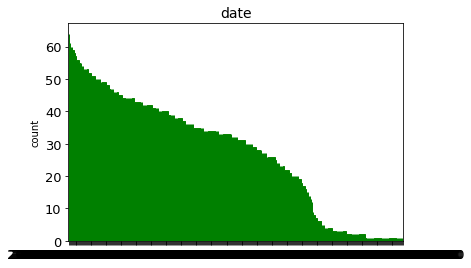

In [9]:
Graph(data, columns = '', directory = r"/Users/pranavsmac/Documents/Praxis Study Materials/Dataset")

<AxesSubplot:title={'center':'HP Heatmap'}>

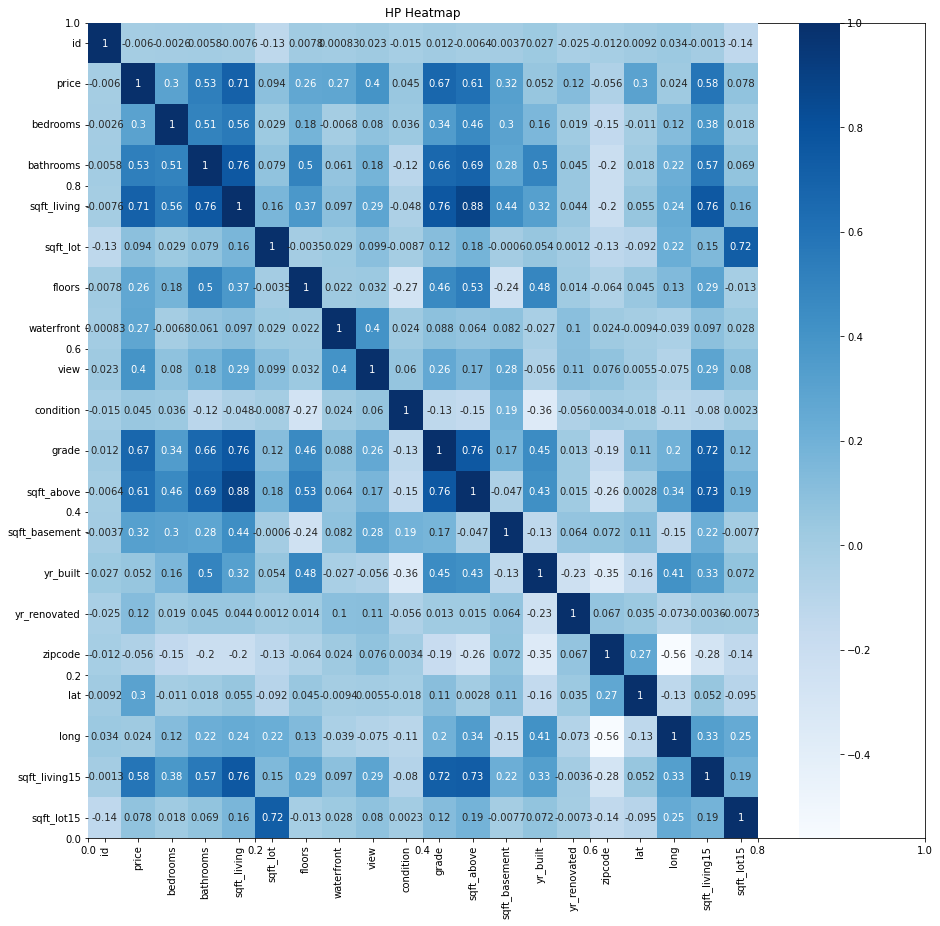

In [10]:
plt.subplots(figsize=(15,15))
ax = plt.axes()
ax.set_title("HP Heatmap")
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",annot = True)

In [11]:
data['date'] = pd.to_datetime(data['date']).dt.date  # splitting date and time into a two different column
data['time'] = pd.to_datetime(data['date']).dt.time 
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,00:00:00
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,00:00:00
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,00:00:00
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,00:00:00
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,00:00:00


In [12]:
data = data.drop(['sqft_living15', 'sqft_lot15', 'time'], axis = 1) #droping 3 unnecessary variables

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

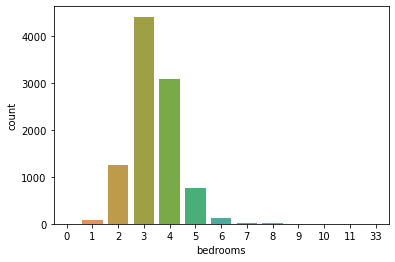

In [13]:
sns.countplot(data.bedrooms)

Observation : Most of the houses has 3 Nos of bedrooms, few houses has 4 no of bedrooms, there are less no of auses with 1,2, 5 & 6 no of bedrooms.

<AxesSubplot:xlabel='grade', ylabel='count'>

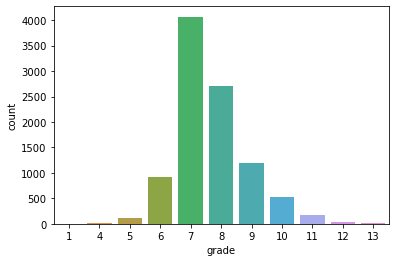

In [14]:
sns.countplot(data.grade)

Observation :  Majority of the houses are with the grade rating of 7 followed by grade rating of 8. we can observe few houses with grade rating 9,6 & 10. here 13 is the highest grade rating means house is very good and 1 is the lowest which means house is not very good. very few no houses are with the grade rating 12 & 13.

## Observation
**Price** = majority of houses are in the range of 0 t 0.9 million ,few houses are in range of 0.9 to 1.6 millon, very less houses are in range of 1.6 to 2.4.

**Bathrooms** = most of the houses has 2 to 3 no of bathrooms,few houses has 1 no of bathroom and few has 3 to 4 no of houses.

**sqft_living** = most of the houses has sqft_living area 1700 to 2600 , few hosues with area less tha 2000 sqft and some with in area range of 2600 to 4000. least no of houses with area range of 5000 to 6000.

**sqft_lot** = majority of houses are with square_lot area 20000 sqft and very few houses are with sq_lot area greater than 20000.

**floors** = Majority of the houses are with 1 & 2 floors, few with 1.5 floors, some with 3 floors and very less no of houses with 2.5 floors.

**sqft_above** = Majority of the houses has area between 1500 to 2000 sqft, few houses has area range of less than 1500 sqft and between 2000 to 3000 sqft.

**yr_built** = Majority of the houses are built between 2002 to 2017, few houses built between 1950 to 2000 and least no of houses built between 1900 to 1950.

**yr_renovated** = Majority of the houses are not renovated. very few houses were renovated between 1940 to 2000.

**zipcode** = Majority of the houses are in zipcode area 98024 to 98045, second highest no of houses are in zipcode area 98100 to 98120.

**lat** = We can observe that majority if the houses has lat range of 47.5 to 47.8.

**long** = We can observe that majority of the houses has longitude of -122.4 to -122.2.

In [15]:
data.sqft_above[data.sqft_above<7000]

0       1050
1       3890
2        860
3       1430
4       1370
        ... 
9756    1490
9757    2520
9758    2600
9759    1020
9760    1020
Name: sqft_above, Length: 9758, dtype: int64

In [16]:
data.sqft_lot[data.sqft_lot<20000]

0        5000
2        6000
3       19901
4        9680
5        5000
        ...  
9756     1126
9757     6023
9758     7200
9759     1350
9760     1076
Name: sqft_lot, Length: 8732, dtype: int64

In [17]:
waterfront=pd.crosstab(data.waterfront,columns="Count")
waterfront

col_0,Count
waterfront,
0,9679
1,82


In [18]:
value_waterfront=[9679,82]
label_waterfront=["0","1"]

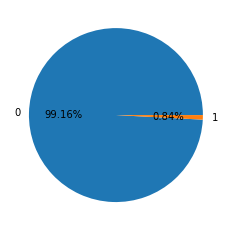

In [19]:
plt.pie(value_waterfront,labels=label_waterfront,autopct="%0.2f%%")
plt.show()

Observation : There is only 0.84% houses has a waterfront annd 99.16% houses are without waterfront in it so we can say there are very less houses with waterfront.

<AxesSubplot:xlabel='view', ylabel='count'>

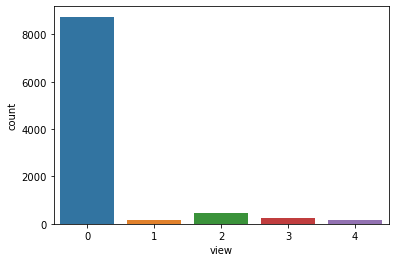

In [20]:
sns.countplot(data.view)

Observation: Majority of the houses are with no view, few houses with 2 no of view and very less no of houses are there with 1, 3 and 4 no of view or visitation.

<AxesSubplot:xlabel='condition', ylabel='count'>

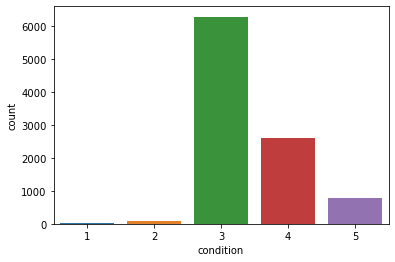

In [21]:
sns.countplot(data.condition)

Observation : majority of the houses are with condition rating 3 which we can say above average,few houses has condition rating of 4, third highest rating is 5 and least rating is 1 & 2.

<AxesSubplot:xlabel='zipcode', ylabel='Density'>

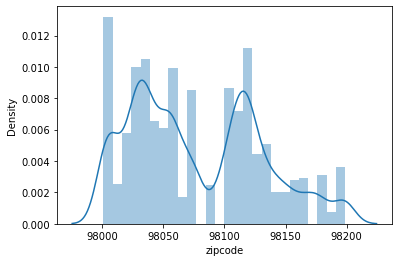

In [22]:
sns.distplot(data.zipcode)

Observation : Maority of the houses has no basement and basement area range of houses with basement is between 100 to 1000 sqft, very few houses with area range of 1000 to 1700.

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

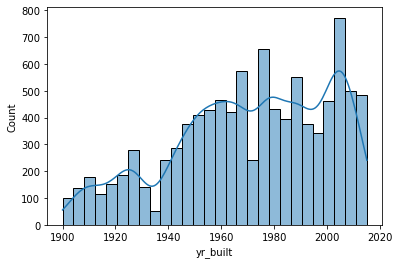

In [23]:
sns.histplot(data.yr_built,kde = True)

In [24]:
data["bedrooms"] = data["bedrooms"].replace(33,3) # replacing the outlier with mode

In [25]:
data.bedrooms.max() 

11

<AxesSubplot:title={'center':'price'}, xlabel='bedrooms'>

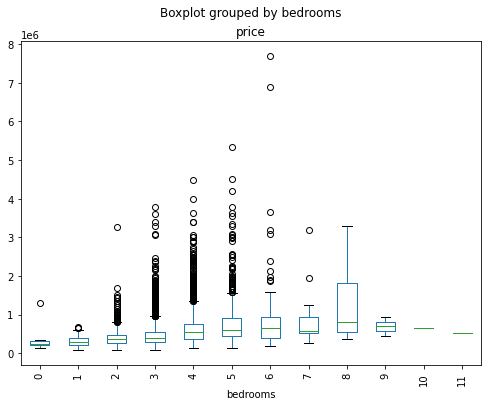

In [26]:
data.boxplot(column="price",
             by="bedrooms",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : We can observe that as the number of bedroom increases price of the house increses.

<AxesSubplot:title={'center':'price'}, xlabel='waterfront'>

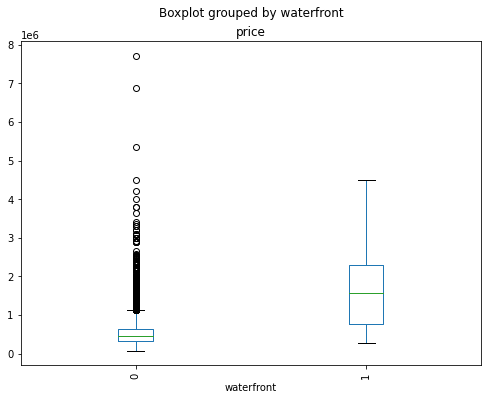

In [27]:
data.boxplot(column="price",
             by="waterfront",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : We can observe that as the houese with waterfromy has higher price compare to houses without waterfront. we can see few house which has higher price which do not include waterfront that may be becuse of the other factors like square ft area,size, location of the house.

<AxesSubplot:title={'center':'price'}, xlabel='view'>

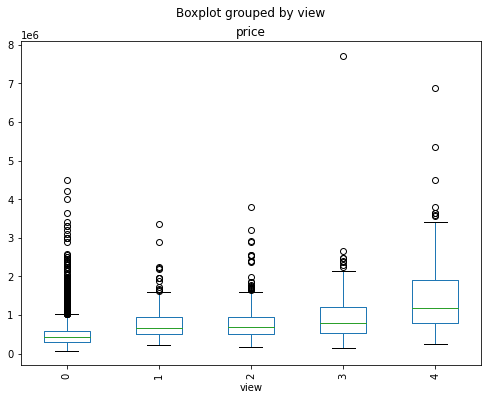

In [28]:
data.boxplot(column="price",
             by="view",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

<AxesSubplot:title={'center':'price'}, xlabel='condition'>

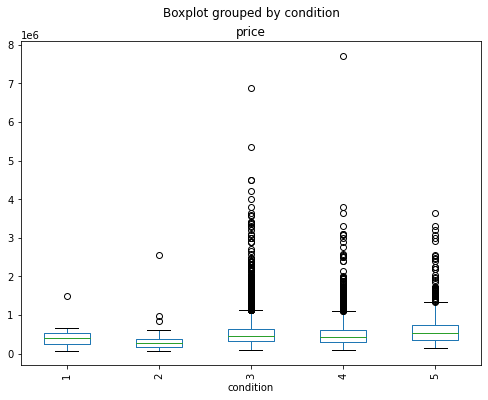

In [29]:
data.boxplot(column="price",
             by="condition",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

<AxesSubplot:title={'center':'price'}, xlabel='grade'>

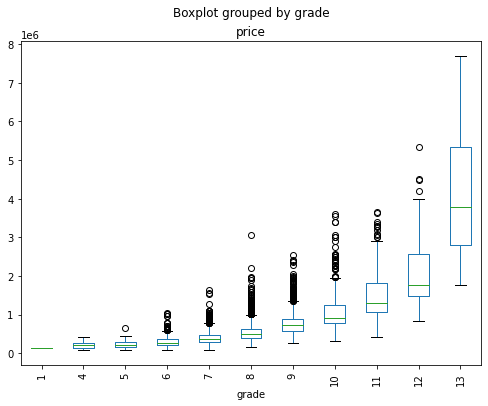

In [30]:
data.boxplot(column="price",
             by="grade",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

Text(0.5, 1.0, 'price vs sqft_living')

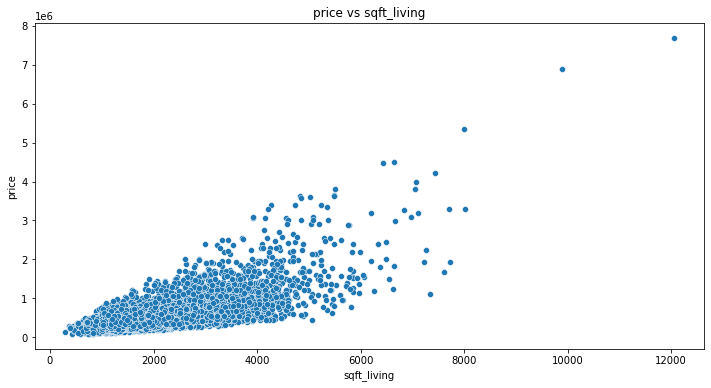

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_living' , data=data )
plt.title("price vs sqft_living")

**Observation** : As per graph we can observe that price is increasing when sqft_living is increasing. it shows positive correlation.

<AxesSubplot:title={'center':'price'}, xlabel='bathrooms'>

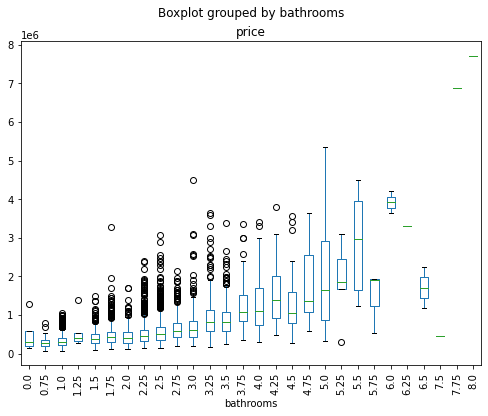

In [32]:
data.boxplot(column="price",
             by="bathrooms",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : We can observe that as no of bathroom is incresing , price of the house is increasing. It shows strongly positive correlation.

<AxesSubplot:title={'center':'price'}, xlabel='floors'>

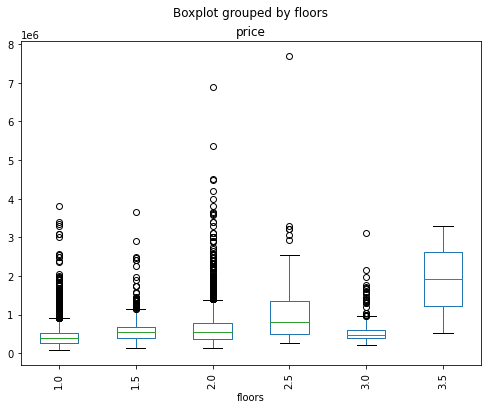

In [33]:
data.boxplot(column="price",
             by="floors",
            grid=False,
            figsize=(8,6),
            rot=90)

**Observation** : 

Text(0.5, 1.0, 'price vs sqft_lot')

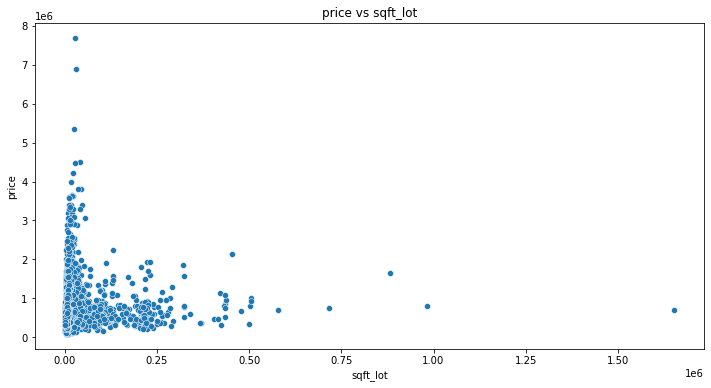

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_lot' , data=data )
plt.title("price vs sqft_lot")

**Observation** : We can observe that most of the houses has same sqft_lot vale but prices are different that means prices do not incerese with increse in value of sqft_lot. there may be a building with differnt floors and multiple no of houses with differnt size of living area. sqft_lot is not negatively correlated but we can't se strong positive correlation between price and sqft_lot.

Text(0.5, 1.0, 'price vs sqft_above')

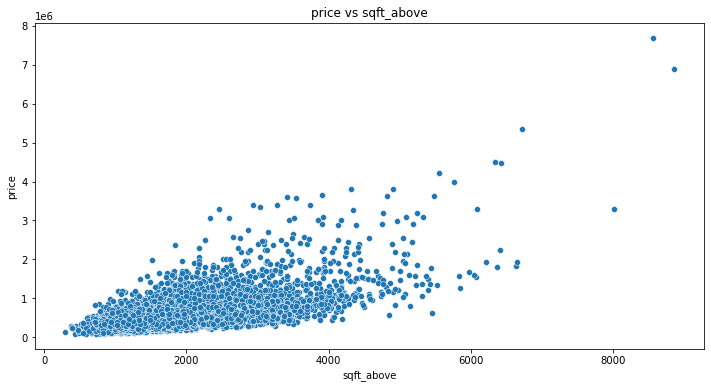

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_above' , data=data )
plt.title("price vs sqft_above")

**Observation** : As per graph we can observe that sqft_above is positively correlated with price. price of the house incereses as area in sqft_above increses.

Text(0.5, 1.0, 'price vs sqft_basement')

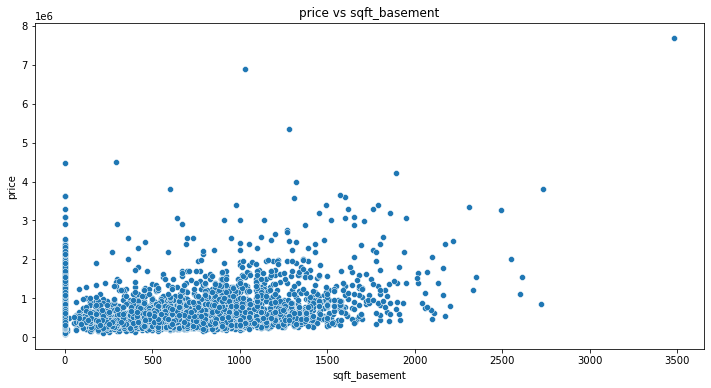

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='sqft_basement' , data=data )
plt.title("price vs sqft_basement")

**Observation** : we can observe that price and sqft_basemet is somewhat correlated. there are few houses with same basement ares have different price that may be beacuse of the other fctors ike total living area of the house, lot area and loction of the house.

Text(0.5, 1.0, 'price vs sqft_basement')

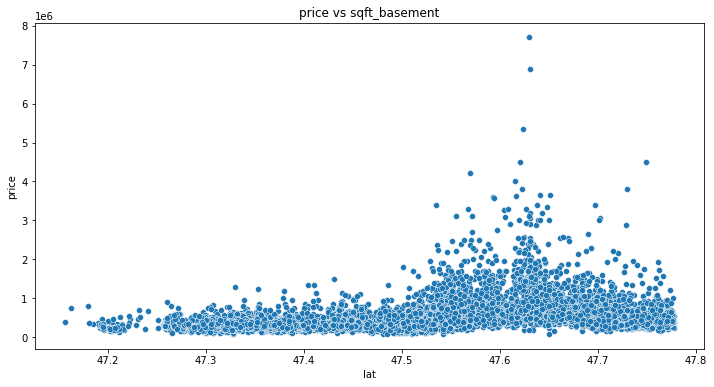

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='lat' , data=data )
plt.title("price vs sqft_basement")

Text(0.5, 1.0, 'sqft_lot vs lat')

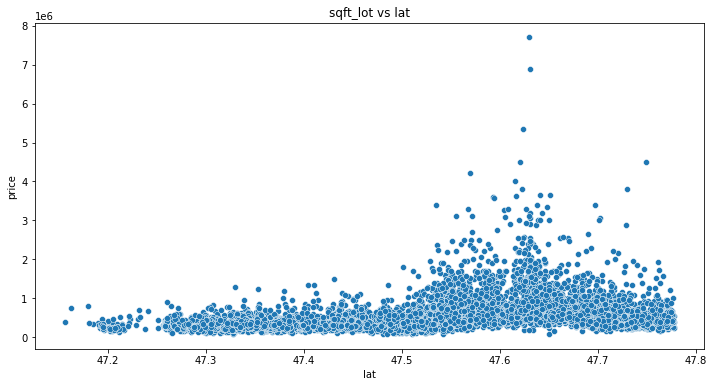

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='lat' , data=data)
plt.title("sqft_lot vs lat")

Text(0.5, 1.0, 'sqft_lot vs lat')

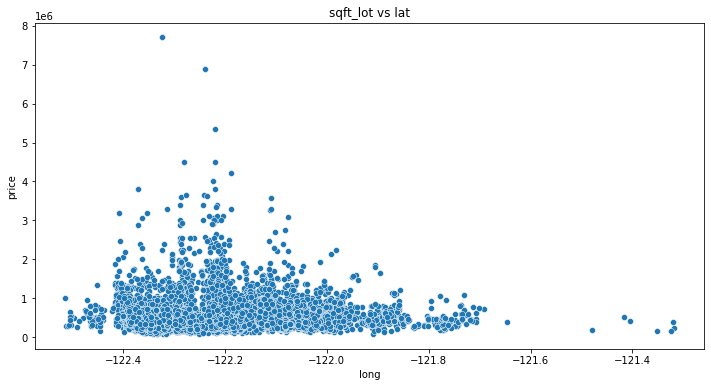

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='price' , x='long' , data=data)
plt.title("sqft_lot vs lat")

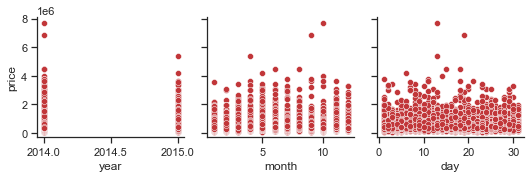

In [60]:
#Bivariate analysis of price and year/month/day
sns.set(style="ticks", color_codes=True,palette='RdBu')
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['year','month','day'])

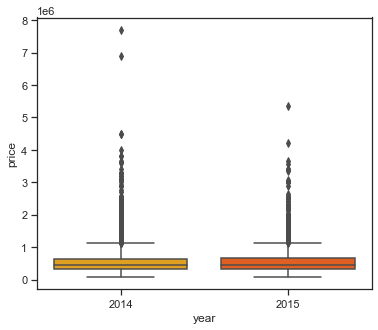

In [61]:
#Bivariate analysis of price and year
sns.boxplot(x = "year",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(6, 5)

plt.show()

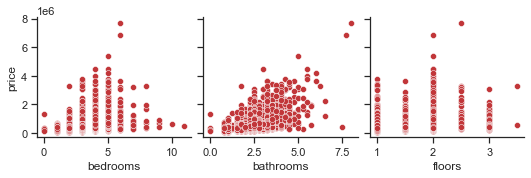

In [62]:
#Bivariate analysis of price and bedrooms/bathrooms/floors
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['bedrooms','bathrooms','floors'])

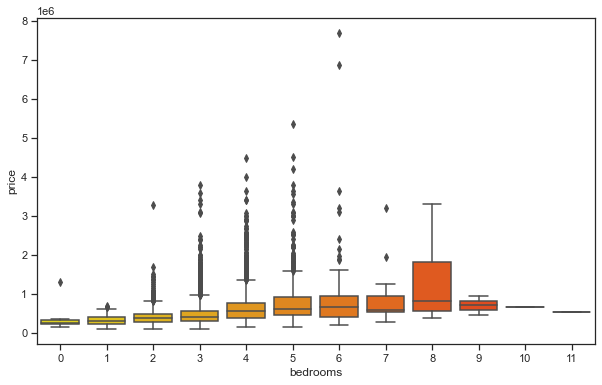

In [63]:
#Bivariate analysis of price and bedrooms
sns.boxplot(x = "bedrooms",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10,6)

plt.show()

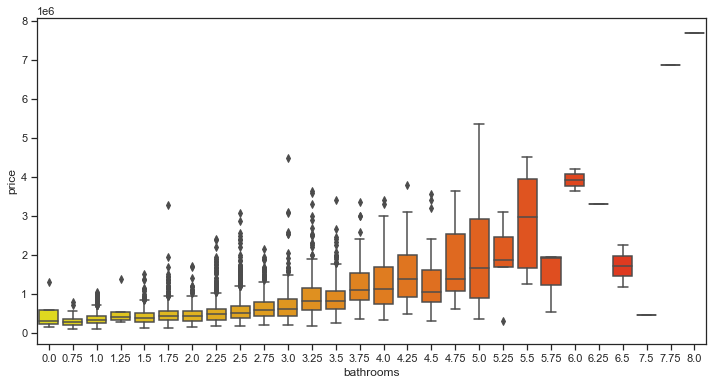

In [64]:
#Bivariate analysis of price and bathrooms
sns.boxplot(x = "bathrooms",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(12, 6)

plt.show()

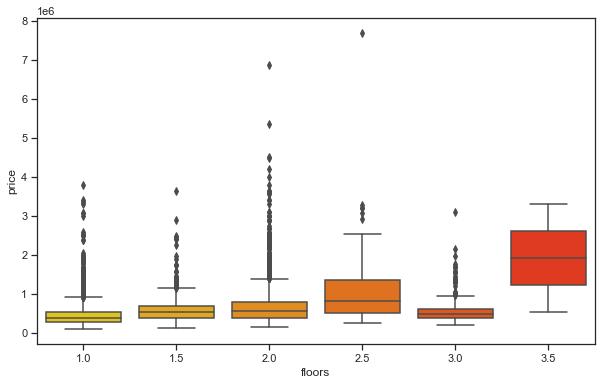

In [65]:
#Bivariate analysis of price and floors
sns.boxplot(x = "floors",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

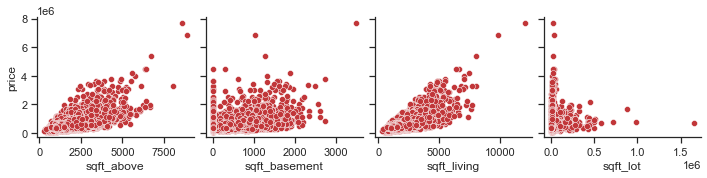

In [66]:
#Bivariate analysis of price and sqft_above/sqft_basement/sqft_living/sqft_lot
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['sqft_above','sqft_basement','sqft_living','sqft_lot'])

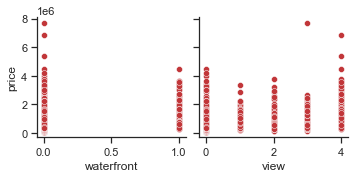

In [67]:
#Bivariate analysis of price and waterfront/view
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['waterfront','view'])

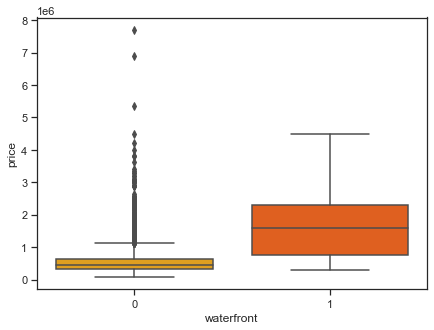

In [68]:
#Bivariate analysis of price and waterfront
sns.boxplot(x = "waterfront",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(7, 5)

plt.show()

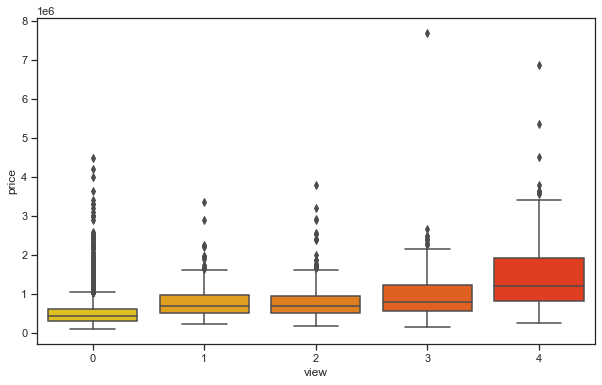

In [69]:
#Bivariate analysis of price and view
sns.boxplot(x = "view",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

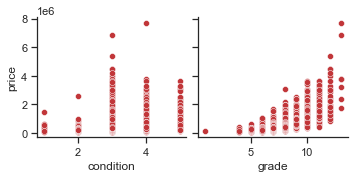

In [70]:
#Bivariate analysis of price and condition/grade
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['condition','grade'])

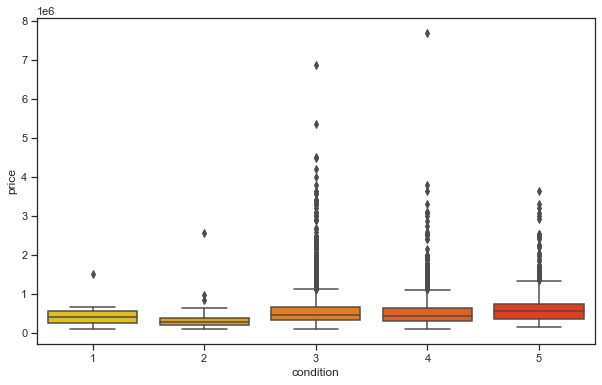

In [71]:
#Bivariate analysis of price and condition
sns.boxplot(x = "condition",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

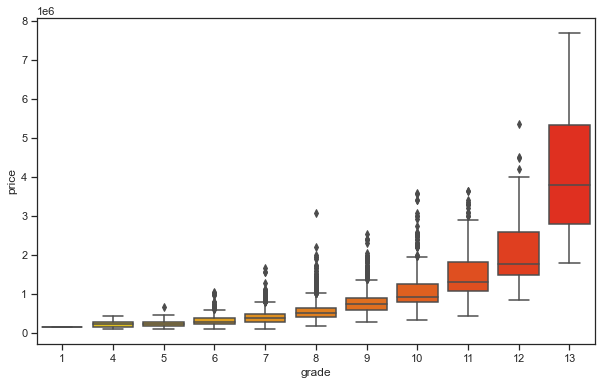

In [72]:
#Bivariate analysis of price and grade
sns.boxplot(x = "grade",y= "price",data = data, palette = "autumn_r")
plt.gcf().set_size_inches(10, 6)

plt.show()

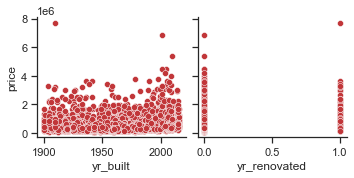

In [73]:
#Bivariate analysis of price and yr_built/yr_renovated
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['yr_built','yr_renovated'])

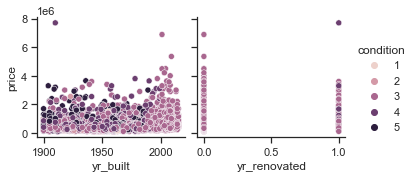

In [74]:
sns.set(style="ticks", color_codes=True, palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['yr_built','yr_renovated'], hue='condition')

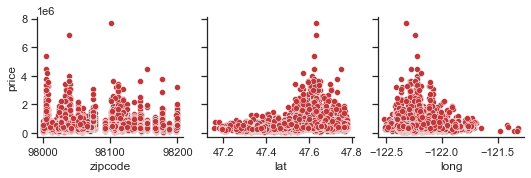

In [75]:
#Bivariate analysis of price and zipcode/lat/long
sns.set(style="ticks", color_codes=True,palette="RdBu")
sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=['zipcode','lat','long'])

In [48]:
#Plotting the correlation matrix 
corr=data.corr()
corr.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,year,month,day,age
price,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754,0.014201,-0.019068,-0.014702,-0.051534
bedrooms,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,-0.005814,-0.006170,-0.011797,-0.155198
bathrooms,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,-0.012303,-0.004583,-0.009090,-0.499796
sqft_living,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,-0.016340,0.001445,-0.010158,-0.322991
sqft_lot,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.004337,0.004406,0.010032,-0.053976
floors,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,-0.008066,0.001953,0.003893,-0.482065
waterfront,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,-0.014322,0.015162,0.005732,0.026783
view,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.003450,-0.005705,0.004273,0.056417
condition,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.046312,0.016593,-0.004454,0.356668
grade,0.665567,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.107977,0.201114,-0.012124,-0.009408,-0.014749,-0.448021


# Model Fitting

In [40]:
#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [41]:
data.loc[data["yr_renovated"] != 0,"yr_renovated"] = "1"

In [42]:
data.loc[data["yr_renovated"] != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
56,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0,3,8,1980,770,1914,1,98004,47.6141,-122.212
92,6300000550,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0,0,3,7,1600,700,1920,1,98133,47.7067,-122.343
100,8096000060,2015-04-13,655000.0,2,1.75,1450,15798,2.0,1,4,3,7,1230,220,1915,1,98166,47.4497,-122.375
104,7228500560,2015-03-20,410000.0,4,1.00,1970,4740,1.5,0,0,3,7,1670,300,1904,1,98122,47.6136,-122.303
119,7960900060,2015-05-04,2900000.0,4,3.25,5050,20100,1.5,0,2,3,11,4750,300,1982,1,98004,47.6312,-122.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,722059020,2015-03-18,550000.0,6,4.50,4520,40164,2.0,0,0,3,9,3580,940,1953,1,98031,47.4070,-122.216
8869,6821101285,2014-08-14,819000.0,3,1.75,1850,6000,1.5,0,0,3,8,1650,200,1913,1,98199,47.6528,-122.401
9086,126039256,2014-09-04,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,1,98177,47.7770,-122.362
9260,3319500628,2015-02-12,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,1,98144,47.5998,-122.311


In [43]:
X = data.drop(["id","price","sqft_basement","lat","long","sqft_above","sqft_basement","yr_built"], axis=1)
y = data.price

**Reasons for considering predictors**:

We are considering bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated and zipcode as from bivariate analysis we can some positive effect on price. we have dropped variable sqft_above and sqft_basement as we have observed that addition of sqft_above and sqft_basement is giving output same as sqft_living area.in this case we are only including zipcode for location and dropping lat and long variables.

In [44]:
X.loc[data["yr_renovated"] != 0]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,zipcode
56,2015-03-02,4,2.75,2750,17789,1.5,0,0,3,8,1,98004
92,2014-07-17,6,3.00,2300,3404,2.0,0,0,3,7,1,98133
100,2015-04-13,2,1.75,1450,15798,2.0,1,4,3,7,1,98166
104,2015-03-20,4,1.00,1970,4740,1.5,0,0,3,7,1,98122
119,2015-05-04,4,3.25,5050,20100,1.5,0,2,3,11,1,98004
...,...,...,...,...,...,...,...,...,...,...,...,...
8847,2015-03-18,6,4.50,4520,40164,2.0,0,0,3,9,1,98031
8869,2014-08-14,3,1.75,1850,6000,1.5,0,0,3,8,1,98199
9086,2014-09-04,3,2.00,1520,5040,2.0,0,0,3,7,1,98177
9260,2015-02-12,3,1.50,1010,1546,2.0,0,0,3,8,1,98144


# Linear Regression base model

In [45]:
X = data.drop(["date","id","price","sqft_lot", "floors", "waterfront", "view","sqft_basement","lat","long", "yr_renovated", "zipcode","yr_built","condition", "grade"], axis=1)
y = data.price
X = sm.add_constant(X)
X.head()

,const,bedrooms,bathrooms,sqft_living,sqft_above
0,1.0,4,3.00,1960,1050
1,1.0,4,4.50,5420,3890
2,1.0,2,1.00,1160,860
3,1.0,3,1.00,1430,1430
4,1.0,3,1.75,1370,1370


In [46]:
#Train-Validation Split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2075.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:43:35   Log-Likelihood:            -1.0866e+05
No. Observations:                7808   AIC:                         2.173e+05
Df Residuals:                    7803   BIC:                         2.174e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.426e+04   1.22e+04      6.891      0.000    6.03e+04    1.08e+05
bedrooms    -6.924e+04   4187.339    -16.534      0.000   -7.74e+04    -6.1e+04
bathrooms    7786.6881   6122.891      1.272      0.204   -4215.819    1.98e+04
sqft_living   349.7363      7.975     43.854      0.000     334.103     365.369
sqft_above    -29.8497      7.651     -3.901      0.000     -44.847     -14.852
==============================================================================
Omnibus:                     5120.048   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145638.419
Skew:                           2.709   Prob(JB):                         0.00
Kurtosis:                      23.452   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 1st

In [122]:
X = data.drop(columns=['price','id','date'])
y = data.price
X = sm.add_constant(X)

In [123]:
X.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14479,1.0,5,1.75,2850,11860,1.0,0,0,3,9,2850.0,0,1951,0,98155,47.7503,-122.280,2640,11604
3353,1.0,3,1.00,1010,5490,1.0,0,0,3,6,1010.0,0,1954,0,98168,47.4762,-122.293,1740,10658
12064,1.0,3,1.00,1090,10114,1.0,0,0,4,7,1090.0,0,1955,0,98002,47.2975,-122.223,1380,7800
4139,1.0,4,2.00,1740,6369,1.0,0,0,5,6,870.0,870,1954,0,98133,47.7461,-122.332,1560,7200
15414,1.0,3,1.00,1120,8631,1.0,0,0,3,7,1120.0,0,1942,0,98125,47.7077,-122.314,1350,7714


In [124]:
np.sum(X.isnull())

const            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [125]:
X

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14479,1.0,5,1.75,2850,11860,1.0,0,0,3,9,2850.0,0,1951,0,98155,47.7503,-122.280,2640,11604
3353,1.0,3,1.00,1010,5490,1.0,0,0,3,6,1010.0,0,1954,0,98168,47.4762,-122.293,1740,10658
12064,1.0,3,1.00,1090,10114,1.0,0,0,4,7,1090.0,0,1955,0,98002,47.2975,-122.223,1380,7800
4139,1.0,4,2.00,1740,6369,1.0,0,0,5,6,870.0,870,1954,0,98133,47.7461,-122.332,1560,7200
15414,1.0,3,1.00,1120,8631,1.0,0,0,3,7,1120.0,0,1942,0,98125,47.7077,-122.314,1350,7714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1.0,3,1.50,1000,6914,1.0,0,0,3,7,1000.0,0,1947,0,98125,47.7144,-122.319,1000,6947
21575,1.0,3,2.50,3087,5002,2.0,0,0,3,8,3087.0,0,2014,0,98023,47.2974,-122.349,2927,5183
5390,1.0,3,2.50,2120,4780,2.0,0,0,3,7,2120.0,0,2004,0,98053,47.6810,-122.032,1690,2650
860,1.0,1,0.75,380,15000,1.0,0,0,3,5,380.0,0,1963,0,98168,47.4810,-122.323,1170,15000


In [126]:
np.sum(y.isnull())

0

In [127]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [128]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2116.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:02:35   Log-Likelihood:            -2.0759e+05
No. Observations:               15246   AIC:                         4.152e+05
Df Residuals:                   15228   BIC:                         4.154e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.104e+06   3.45e+06      1.481      0.139   -1.65e+06    1.19e+07
bedrooms      -3.337e+04   2209.732    -15.101      0.000   -3.77e+04    -2.9e+04
bathrooms      4.698e+04   3843.175     12.225      0.000    3.94e+04    5.45e+04
sqft_living     106.5127      2.675     39.817      0.000     101.269     111.756
sqft_lot          0.1257      0.060      2.101      0.036       0.008       0.243
floors         4325.1541   4233.941      1.022      0.307   -3973.878    1.26e+04
waterfront     5.631e+05   2.04e+04     27.640      0.000    5.23e+05    6.03e+05
view           5.238e+04   2518.499     20.797      0.000    4.74e+04    5.73e+04
condition      2.501e+04   2759.957      9.063      0.000    1.96e+04    3.04e+04
grade          9.352e+04   2542.514     36.783      0.000    8.85e+04    9.85e+04
sqft_above       69.8975      2.649     26.390      0.000      64.706      75.089
sqft_basement    36.6125      3.127     11.707      0.000      30.482      42.743
yr_built      -2671.7776     85.188    -31.363      0.000   -2838.757   -2504.798
yr_renovated     20.7613      4.393      4.726      0.000      12.151      29.372
zipcode        -542.7206     38.731    -14.013      0.000    -618.638    -466.803
lat            6.007e+05   1.26e+04     47.578      0.000    5.76e+05    6.25e+05
long          -1.976e+05   1.55e+04    -12.772      0.000   -2.28e+05   -1.67e+05
sqft_living15    24.5408      4.048      6.062      0.000      16.606      32.475
sqft_lot15       -0.3759      0.088     -4.264      0.000      -0.549      -0.203
==============================================================================
Omnibus:                    13491.865   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1721253.769
Skew:                           3.728   Prob(JB):                         0.00
Kurtosis:                      54.517   Cond. No.                     4.78e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.76e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### train

In [129]:
y_pred = (model.predict(X_train))

In [130]:
y_ = (y_train)

In [131]:
#MAE
np.mean(np.abs(y_ - y_pred))

124361.00925482363

In [132]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

25.299672758251003

#### Valid

In [133]:
y_pred = model.predict(X_valid)

In [134]:
#MAE
np.mean(np.abs(y_valid - y_pred))

127571.19591032263

In [135]:
#MSE
np.mean((y_valid - y_pred)**2)

39108008850.55477

In [136]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

197757.4495450292

In [137]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

26.205420795155593

### Decision Tree

In [48]:
# Fitting a regression tree
reg_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)

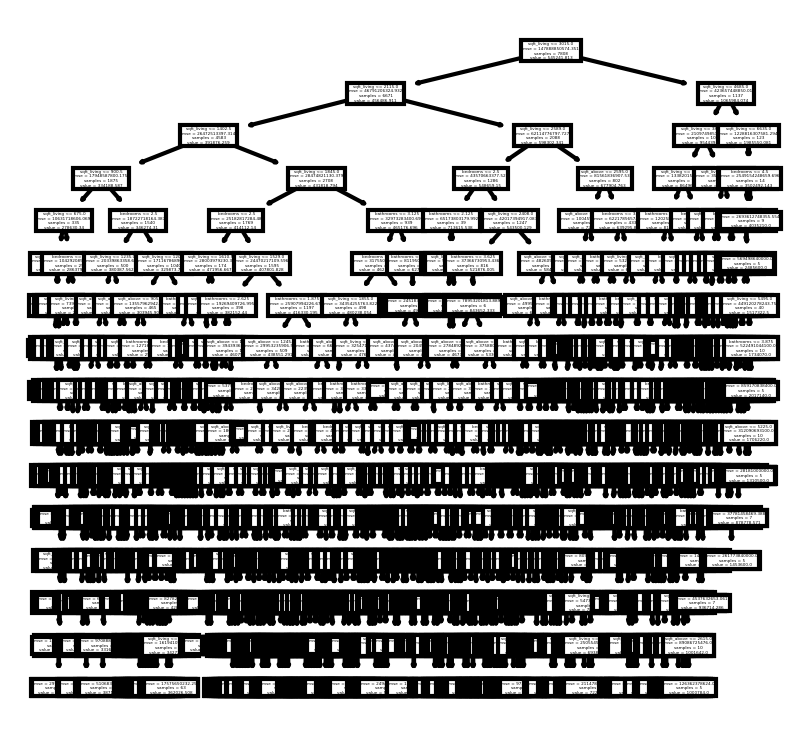

In [49]:
# Plotting a regression tree
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [50]:
#Prediction
y_pred = reg_tree.predict(X_valid)
y_pred

array([339640.        , 717300.        , 441055.55555556, ...,
       256985.        , 343446.15384615, 375327.75925926])

###  Model Performance Check

In [51]:
# MAE
np.mean(np.abs(y_valid - y_pred))

172777.26551223337

In [52]:
# MSE
np.mean((y_valid - y_pred)**2)

72014732182.45428

In [53]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

268355.6076970524

In [54]:
# MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

35.89766494344151

In [55]:
data.corr()['price'].sort_values()

zipcode         -0.055629
id              -0.005972
long             0.023754
condition        0.044732
yr_built         0.051759
sqft_lot         0.094143
floors           0.262954
waterfront       0.274977
lat              0.299280
bedrooms         0.315763
sqft_basement    0.322383
view             0.399658
bathrooms        0.527532
sqft_above       0.611453
grade            0.665567
sqft_living      0.705052
price            1.000000
Name: price, dtype: float64

# 2nd

In [138]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade']]
y = data.price
X = sm.add_constant(X)

In [139]:
X.head()

,const,sqft_living,sqft_above,bedrooms,bathrooms,grade
14479,1.0,2850,2850.0,5,1.75,9
3353,1.0,1010,1010.0,3,1.00,6
12064,1.0,1090,1090.0,3,1.00,7
4139,1.0,1740,870.0,4,2.00,6
15414,1.0,1120,1120.0,3,1.00,7


In [140]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [141]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3768.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:03:27   Log-Likelihood:            -2.1070e+05
No. Observations:               15246   AIC:                         4.214e+05
Df Residuals:                   15240   BIC:                         4.215e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.23e+05   1.77e+04    -29.516      0.000   -5.58e+05   -4.88e+05
sqft_living   274.4069      5.358     51.216      0.000     263.905     284.909
sqft_above    -78.7645      5.183    -15.197      0.000     -88.924     -68.605
bedrooms    -3.904e+04   2657.108    -14.694      0.000   -4.43e+04   -3.38e+04
bathrooms   -2.147e+04   4073.155     -5.272      0.000   -2.95e+04   -1.35e+04
grade        1.058e+05   2816.174     37.557      0.000       1e+05    1.11e+05
==============================================================================
Omnibus:                    12326.363   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           902833.025
Skew:                           3.382   Prob(JB):                         0.00
Kurtosis:                      40.088   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [471]:
y_pred = (model.predict(X_train))

In [472]:
y_ = (y_train)

In [473]:
#MAE
np.mean(np.abs(y_ - y_pred))

158419.66100427834

In [474]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

32.69947716614955

#### Valid

In [475]:
y_pred = model.predict(X_valid)

In [476]:
#MAE
np.mean(np.abs(y_valid - y_pred))

162163.8228983385

In [477]:
#MSE
np.mean((y_valid - y_pred)**2)

59853215960.69106

In [478]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

244649.16913958866

In [479]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

33.81233083392823

# 3rd

In [480]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade','waterfront']]
y = data.price
X = sm.add_constant(X)

In [481]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [482]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     3578.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:            -2.1013e+05
No. Observations:               15246   AIC:                         4.203e+05
Df Residuals:                   15239   BIC:                         4.203e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.288e+05   1.71e+04    -30.971      0.000   -5.62e+05   -4.95e+05
sqft_living   257.3488      5.187     49.616      0.000     247.182     267.516
sqft_above    -71.2452      4.999    -14.251      0.000     -81.044     -61.446
bedrooms    -3.148e+04   2569.948    -12.250      0.000   -3.65e+04   -2.64e+04
bathrooms   -2.129e+04   3924.989     -5.423      0.000    -2.9e+04   -1.36e+04
grade        1.053e+05   2713.768     38.793      0.000       1e+05    1.11e+05
waterfront   7.584e+05   2.21e+04     34.254      0.000    7.15e+05    8.02e+05
==============================================================================
Omnibus:                    11369.793   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           771187.140
Skew:                           2.987   Prob(JB):                         0.00
Kurtosis:                      37.326   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [483]:
y_pred = (model.predict(X_train))

In [484]:
y_ = (y_train)

In [485]:
#MAE
np.mean(np.abs(y_ - y_pred))

155317.760016644

In [486]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

32.28925620981416

#### Valid

In [487]:
y_pred = model.predict(X_valid)

In [488]:
#MAE
np.mean(np.abs(y_valid - y_pred))

158344.96081775994

In [489]:
#MSE
np.mean((y_valid - y_pred)**2)

54920057249.660835

In [490]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

234350.28749643307

In [491]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

33.23090960694085

# 4th

In [492]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade','waterfront','sqft_living15']]
y = data.price
X = sm.add_constant(X)

In [493]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [494]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     3074.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:            -2.1012e+05
No. Observations:               15246   AIC:                         4.203e+05
Df Residuals:                   15238   BIC:                         4.203e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.267e+05   1.71e+04    -30.857      0.000    -5.6e+05   -4.93e+05
sqft_living     250.4504      5.385     46.512      0.000     239.896     261.005
sqft_above      -74.6230      5.046    -14.787      0.000     -84.515     -64.731
bedrooms      -3.125e+04   2568.619    -12.166      0.000   -3.63e+04   -2.62e+04
bathrooms     -1.965e+04   3937.512     -4.990      0.000   -2.74e+04   -1.19e+04
grade          1.016e+05   2823.257     35.973      0.000     9.6e+04    1.07e+05
waterfront      7.57e+05   2.21e+04     34.214      0.000    7.14e+05       8e+05
sqft_living15    21.3708      4.520      4.728      0.000      12.511      30.230
==============================================================================
Omnibus:                    11519.615   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           824658.948
Skew:                           3.033   Prob(JB):                         0.00
Kurtosis:                      38.516   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [495]:
y_pred = (model.predict(X_train))

In [496]:
y_ = (y_train)

In [497]:
#MAE
np.mean(np.abs(y_ - y_pred))

155140.95251514725

In [498]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

32.16678820855919

#### Valid

In [499]:
y_pred = model.predict(X_valid)

In [500]:
#MAE
np.mean(np.abs(y_valid - y_pred))

158510.47675769476

In [501]:
#MSE
np.mean((y_valid - y_pred)**2)

54934121902.05126

In [502]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

234380.29333126807

In [503]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

33.16804731371782

# 5th

In [504]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade','waterfront','zipcode']]
y = data.price
X = sm.add_constant(X)

In [505]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [506]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3136.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:            -2.1003e+05
No. Observations:               15246   AIC:                         4.201e+05
Df Residuals:                   15238   BIC:                         4.201e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.208e+07   3.61e+06    -14.432      0.000   -5.92e+07    -4.5e+07
sqft_living   251.1110      5.171     48.560      0.000     240.975     261.247
sqft_above    -58.6625      5.044    -11.631      0.000     -68.549     -48.776
bedrooms    -2.953e+04   2556.660    -11.549      0.000   -3.45e+04   -2.45e+04
bathrooms   -1.838e+04   3904.399     -4.708      0.000    -2.6e+04   -1.07e+04
grade         1.05e+05   2695.951     38.934      0.000    9.97e+04     1.1e+05
waterfront   7.452e+05    2.2e+04     33.855      0.000    7.02e+05    7.88e+05
zipcode       525.3969     36.777     14.286      0.000     453.310     597.484
==============================================================================
Omnibus:                    11431.040   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           778101.483
Skew:                           3.012   Prob(JB):                         0.00
Kurtosis:                      37.476   Cond. No.                     1.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [507]:
y_pred = np.exp(model.predict(X_train))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [508]:
y_ = np.exp(y_train)

In [509]:
#MAE
np.mean(np.abs(y_ - y_pred))

inf

In [510]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

nan

#### Valid

In [511]:
y_pred = model.predict(X_valid)

In [512]:
#MAE
np.mean(np.abs(y_valid - y_pred))

156915.5005652516

In [513]:
#MSE
np.mean((y_valid - y_pred)**2)

54322859012.75311

In [514]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

233072.64750020133

In [515]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

32.85348687186244

# 6th

In [516]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade','waterfront','zipcode']]
y = data.price
X = sm.add_constant(X)

In [517]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [518]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3136.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:            -2.1003e+05
No. Observations:               15246   AIC:                         4.201e+05
Df Residuals:                   15238   BIC:                         4.201e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.208e+07   3.61e+06    -14.432      0.000   -5.92e+07    -4.5e+07
sqft_living   251.1110      5.171     48.560      0.000     240.975     261.247
sqft_above    -58.6625      5.044    -11.631      0.000     -68.549     -48.776
bedrooms    -2.953e+04   2556.660    -11.549      0.000   -3.45e+04   -2.45e+04
bathrooms   -1.838e+04   3904.399     -4.708      0.000    -2.6e+04   -1.07e+04
grade         1.05e+05   2695.951     38.934      0.000    9.97e+04     1.1e+05
waterfront   7.452e+05    2.2e+04     33.855      0.000    7.02e+05    7.88e+05
zipcode       525.3969     36.777     14.286      0.000     453.310     597.484
==============================================================================
Omnibus:                    11431.040   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           778101.483
Skew:                           3.012   Prob(JB):                         0.00
Kurtosis:                      37.476   Cond. No.                     1.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [519]:
y_pred = (model.predict(X_train))

In [520]:
y_ = (y_train)

In [521]:
#MAE
np.mean(np.abs(y_ - y_pred))

153432.46864402684

In [522]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

31.73049029832173

#### Valid

In [523]:
y_pred = model.predict(X_valid)

In [524]:
#MAE
np.mean(np.abs(y_valid - y_pred))

156915.5005652516

In [525]:
#MSE
np.mean((y_valid - y_pred)**2)

54322859012.75311

In [526]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

233072.64750020133

In [527]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

32.85348687186244

In [528]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14479,7739100155,20140804T000000,750000.0,5,1.75,2850,11860,1.0,0,0,...,9,2850.0,0,1951,0,98155,47.7503,-122.280,2640,11604
3353,6099400053,20140529T000000,145000.0,3,1.00,1010,5490,1.0,0,0,...,6,1010.0,0,1954,0,98168,47.4762,-122.293,1740,10658
12064,7468900270,20140729T000000,140000.0,3,1.00,1090,10114,1.0,0,0,...,7,1090.0,0,1955,0,98002,47.2975,-122.223,1380,7800
4139,396100025,20140807T000000,339999.0,4,2.00,1740,6369,1.0,0,0,...,6,870.0,870,1954,0,98133,47.7461,-122.332,1560,7200
15414,1160000255,20140818T000000,311000.0,3,1.00,1120,8631,1.0,0,0,...,7,1120.0,0,1942,0,98125,47.7077,-122.314,1350,7714


In [529]:
data.price = np.log10(data.price)

In [530]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14479,7739100155,20140804T000000,5.875061,5,1.75,2850,11860,1.0,0,0,...,9,2850.0,0,1951,0,98155,47.7503,-122.280,2640,11604
3353,6099400053,20140529T000000,5.161368,3,1.00,1010,5490,1.0,0,0,...,6,1010.0,0,1954,0,98168,47.4762,-122.293,1740,10658
12064,7468900270,20140729T000000,5.146128,3,1.00,1090,10114,1.0,0,0,...,7,1090.0,0,1955,0,98002,47.2975,-122.223,1380,7800
4139,396100025,20140807T000000,5.531478,4,2.00,1740,6369,1.0,0,0,...,6,870.0,870,1954,0,98133,47.7461,-122.332,1560,7200
15414,1160000255,20140818T000000,5.492760,3,1.00,1120,8631,1.0,0,0,...,7,1120.0,0,1942,0,98125,47.7077,-122.314,1350,7714


#  7th

In [531]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade','waterfront']]
y = data.price
X = sm.add_constant(X)

In [532]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [533]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3424.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:                 7409.5
No. Observations:               15246   AIC:                        -1.480e+04
Df Residuals:                   15239   BIC:                        -1.475e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8395      0.011    445.984      0.000       4.818       4.861
sqft_living     0.0001    3.3e-06     40.642      0.000       0.000       0.000
sqft_above   -5.51e-05   3.18e-06    -17.344      0.000   -6.13e-05   -4.89e-05
bedrooms       -0.0062      0.002     -3.772      0.000      -0.009      -0.003
bathrooms      -0.0034      0.002     -1.354      0.176      -0.008       0.002
grade           0.0879      0.002     50.969      0.000       0.085       0.091
waterfront      0.2478      0.014     17.615      0.000       0.220       0.275
==============================================================================
Omnibus:                        7.576   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.602
Skew:                           0.054   Prob(JB):                       0.0223
Kurtosis:                       2.981   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [534]:
y_pred = 10**(model.predict(X_train))

In [535]:
y_ = 10**(y_train)

In [536]:
#MAE
np.mean(np.abs(y_ - y_pred))

145521.67209278498

In [537]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

28.581433163725116

#### Valid

In [538]:
y_pred = 10**model.predict(X_valid)
y_pred

15382    631151.396954
10972    425193.921251
8595     278552.143885
18116    342531.336820
9851     650746.727092
             ...      
4944     334947.199746
13632    654623.015895
21364    426173.622379
5464     341289.588531
19035    634723.353817
Length: 3123, dtype: float64

In [539]:
y_valid = 10**y_valid
y_valid

15382    500000.0
10972    455000.0
8595     245000.0
18116    321000.0
9851     890000.0
           ...   
4944     625000.0
13632    675750.0
21364    419500.0
5464     347000.0
19035    512000.0
Name: price, Length: 3123, dtype: float64

In [540]:
#MAE
np.mean(np.abs(y_valid - y_pred))

147507.52919656664

In [541]:
#MSE
np.mean((y_valid - y_pred)**2)

55724841410.15674

In [542]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

236061.09677402742

In [543]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.929704314404507

#  8th

In [544]:
data.sqft_living = np.log10(data.sqft_living)
data.sqft_above = np.log10(data.sqft_above)

In [545]:
X = data[['sqft_living','sqft_above','bedrooms','bathrooms','grade','waterfront']]
y = data.price
X = sm.add_constant(X)

In [546]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [547]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3319.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:                 7274.5
No. Observations:               15246   AIC:                        -1.454e+04
Df Residuals:                   15239   BIC:                        -1.448e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7077      0.034    108.511      0.000       3.641       3.775
sqft_living     0.6080      0.016     37.599      0.000       0.576       0.640
sqft_above     -0.2240      0.014    -16.231      0.000      -0.251      -0.197
bedrooms       -0.0086      0.002     -5.052      0.000      -0.012      -0.005
bathrooms      -0.0006      0.003     -0.233      0.816      -0.006       0.004
grade           0.0931      0.002     54.641      0.000       0.090       0.096
waterfront      0.2727      0.014     19.266      0.000       0.245       0.300
==============================================================================
Omnibus:                       36.451   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.648
Skew:                           0.118   Prob(JB):                     1.10e-08
Kurtosis:                       2.950   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### train

In [548]:
y_pred = 10**(model.predict(X_train))

In [549]:
y_ = 10**(y_train)

In [550]:
#MAE
np.mean(np.abs(y_ - y_pred))

144907.21903031148

In [551]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

28.640034147788697

#### Valid

In [552]:
y_pred = 10**model.predict(X_valid)

In [553]:
y_valid = 10**y_valid

In [554]:
#MAE
np.mean(np.abs(y_valid - y_pred))

146419.93957590804

In [555]:
#MSE
np.mean((y_valid - y_pred)**2)

52778377044.4469

In [556]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

229735.45012567585

In [557]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.013635115929343

# -----------------------

In [558]:
data.sqft_living = 10**data.sqft_living
data.sqft_above = 10**data.sqft_above

In [559]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14479,7739100155,20140804T000000,5.875061,5,1.75,2850.0,11860,1.0,0,0,...,9,2850.0,0,1951,0,98155,47.7503,-122.280,2640,11604
3353,6099400053,20140529T000000,5.161368,3,1.00,1010.0,5490,1.0,0,0,...,6,1010.0,0,1954,0,98168,47.4762,-122.293,1740,10658
12064,7468900270,20140729T000000,5.146128,3,1.00,1090.0,10114,1.0,0,0,...,7,1090.0,0,1955,0,98002,47.2975,-122.223,1380,7800
4139,396100025,20140807T000000,5.531478,4,2.00,1740.0,6369,1.0,0,0,...,6,870.0,870,1954,0,98133,47.7461,-122.332,1560,7200
15414,1160000255,20140818T000000,5.492760,3,1.00,1120.0,8631,1.0,0,0,...,7,1120.0,0,1942,0,98125,47.7077,-122.314,1350,7714


In [560]:
data[cont].corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.693503,0.101422,0.599310,0.316329,0.616184,0.090942
sqft_living,0.693503,1.000000,0.181169,0.877043,0.431979,0.755294,0.182740
sqft_lot,0.101422,0.181169,1.000000,0.190538,0.018855,0.153672,0.738922
sqft_above,0.599310,0.877043,0.190538,1.000000,-0.054412,0.731007,0.192667
sqft_basement,0.316329,0.431979,0.018855,-0.054412,1.000000,0.197523,0.018122
sqft_living15,0.616184,0.755294,0.153672,0.731007,0.197523,1.000000,0.183245
sqft_lot15,0.090942,0.182740,0.738922,0.192667,0.018122,0.183245,1.000000


# 8th

In [579]:
X = data[['sqft_living15','sqft_above','bedrooms','bathrooms','grade','waterfront','sqft_living']]
y = data.price
X = sm.add_constant(X)

In [580]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [581]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     3000.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:06:23   Log-Likelihood:                 7506.0
No. Observations:               15246   AIC:                        -1.500e+04
Df Residuals:                   15238   BIC:                        -1.493e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8435      0.011    449.014      0.000       4.822       4.865
sqft_living15   3.98e-05   2.86e-06     13.935      0.000    3.42e-05    4.54e-05
sqft_above    -6.139e-05   3.19e-06    -19.250      0.000   -6.76e-05   -5.51e-05
bedrooms         -0.0057      0.002     -3.528      0.000      -0.009      -0.003
bathrooms        -0.0003      0.002     -0.131      0.895      -0.005       0.005
grade             0.0810      0.002     45.392      0.000       0.077       0.084
waterfront        0.2453      0.014     17.544      0.000       0.218       0.273
sqft_living       0.0001    3.4e-06     35.593      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.265   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.663
Skew:                           0.039   Prob(JB):                      0.00484
Kurtosis:                       2.897   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### train

In [582]:
y_pred = 10**(model.predict(X_train))

In [583]:
y_ = 10**(y_train)

In [584]:
#MAE
np.mean(np.abs(y_ - y_pred))

145046.23098637146

In [585]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

28.467324415649596

#### Valid

In [586]:
y_pred = 10**model.predict(X_valid)

In [587]:
y_valid = 10**y_valid

In [588]:
#MAE
np.mean(np.abs(y_valid - y_pred))

148698.00005360367

In [589]:
#MSE
np.mean((y_valid - y_pred)**2)

56465827948.366295

In [590]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

237625.39415720344

In [591]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.956474441972535

# 9th

In [592]:
X = data[['sqft_living15','sqft_above','bedrooms','bathrooms','bathrooms','grade','sqft_living']]
y = data.price
X = sm.add_constant(X)

In [593]:
X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.17,random_state=42)

In [594]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3380.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:06:23   Log-Likelihood:                 7353.6
No. Observations:               15246   AIC:                        -1.469e+04
Df Residuals:                   15239   BIC:                        -1.464e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8455      0.011    444.764      0.000       4.824       4.867
sqft_living15  4.045e-05   2.88e-06     14.023      0.000    3.48e-05    4.61e-05
sqft_above    -6.393e-05   3.22e-06    -19.867      0.000   -7.02e-05   -5.76e-05
bedrooms         -0.0082      0.002     -4.999      0.000      -0.011      -0.005
bathrooms        -0.0002      0.001     -0.134      0.893      -0.003       0.002
bathrooms        -0.0002      0.001     -0.134      0.893      -0.003       0.002
grade             0.0810      0.002     44.967      0.000       0.077       0.085
sqft_living       0.0001   3.42e-06     36.930      0.000       0.000       0.000
==============================================================================
Omnibus:                       16.866   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.787
Skew:                           0.074   Prob(JB):                     0.000226
Kurtosis:                       2.933   Cond. No.                     1.20e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### train

In [595]:
y_pred = 10**(model.predict(X_train))

In [596]:
y_ = 10**(y_train)

In [597]:
#MAE
np.mean(np.abs(y_ - y_pred))

147710.30973996938

In [598]:
#MAPE
np.mean(np.abs(y_ - y_pred)/y_)*100

28.67007196525752

#### Valid

In [599]:
y_pred = 10**model.predict(X_valid)

In [600]:
y_valid = 10**y_valid

In [601]:
#MAE
np.mean(np.abs(y_valid - y_pred))

150361.6135907407

In [602]:
#MSE
np.mean((y_valid - y_pred)**2)

55674322421.476814

In [603]:
#RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

235954.0684571402

In [604]:
#MAPE
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.215324078730205